# Word Art from NLP lesson + Word EDA

In [1]:
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import imread
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from jupyterthemes import jtplot
jtplot.style()
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction import text
import unicodedata


# Load Data + Preprocessing

In [2]:
#https://github.com/josephofiowa/zenzic/blob/master/
 #   obama-onion/wordart/.ipynb_checkpoints/wordart-checkpoint.ipynb

path = '../project_3/ALvsST.csv'

df = pd.read_csv(path)
dfc = df.copy()
df.head()

df_AL = df[df['subreddit'] == 0]
df_SK = df[df['subreddit'] == 1]


In [3]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["ha",'wa','im','doe'])

cv = CountVectorizer(stop_words=my_stop_words, min_df=3)
cv2 = CountVectorizer(stop_words=my_stop_words, min_df=3)

cv.fit(df_AL['title'])
cv2.fit(df_SK['title'])

title_cv = cv.transform(df_AL['title'])
title_cv2 = cv2.transform(df_SK['title'])

title_df = pd.DataFrame(title_cv.todense(), columns=cv.get_feature_names())
title_df2 = pd.DataFrame(title_cv2.todense(), columns=cv2.get_feature_names())

# EDA

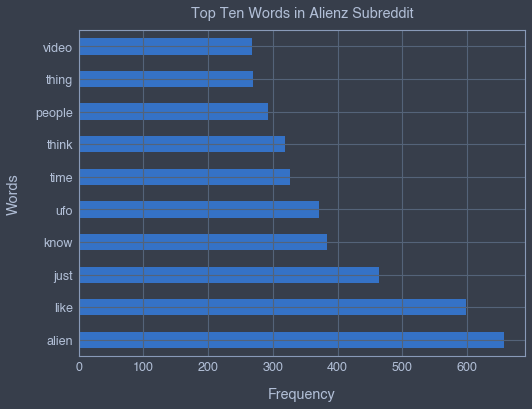

In [4]:
# From carolines nlp lab
title_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6))
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Words", labelpad=14)
plt.title("Top Ten Words in Alienz Subreddit", y=1.02);

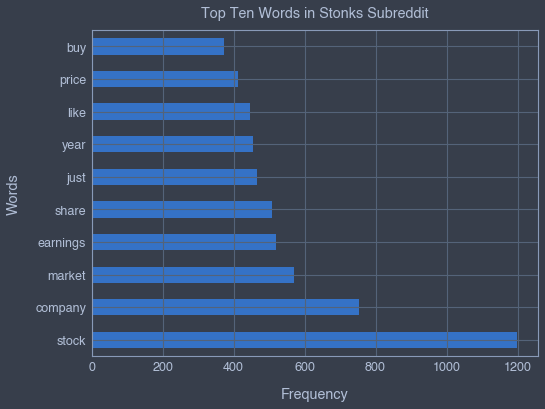

In [5]:
# From carolines nlp lab
title_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6))
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Words", labelpad=14)
plt.title("Top Ten Words in Stonks Subreddit", y=1.02);

In [6]:
title_df.sum().sort_values(ascending=False).head(15)

alien     657
like      599
just      464
know      383
ufo       372
time      326
think     319
people    292
thing     269
video     268
year      250
life      247
human     235
dont      180
earth     179
dtype: int64

In [7]:
title_df2.sum().sort_values(ascending=False).head(15)

stock       1198
company      753
market       569
earnings     519
share        507
just         466
year         454
like         447
price        412
buy          373
new          359
time         337
day          321
think        285
week         283
dtype: int64

In [8]:
title_df2.sum().sort_values(ascending=False).head(50).to_csv('../project_3/stk.csv')

In [9]:
title_df.sum().sort_values(ascending=False).to_csv('../project_3/Al.csv')

In [10]:
title_df2.sum().sort_values(ascending=False).to_csv('../project_3/stk_all.csv')

In [11]:
title_df.sum().sort_values(ascending=False).to_csv('../project_3/Al_all.csv')

TypeError: 'AxesSubplot' object is not iterable

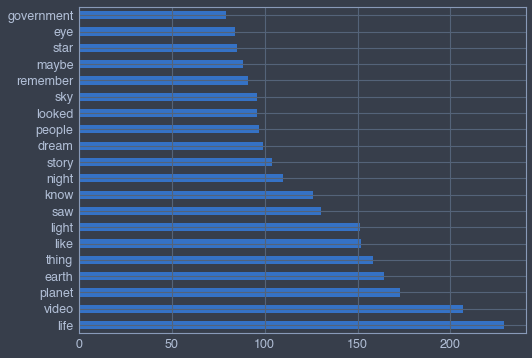

In [12]:
# common words in both subreddits and the difference in terms aliens
set((title_df.sum() - title_df2.sum()).sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8, 6)))

TypeError: 'AxesSubplot' object is not iterable

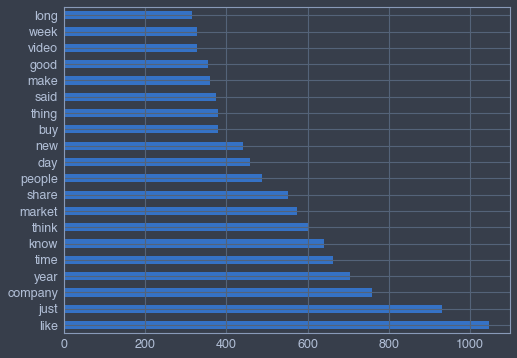

In [13]:
set((title_df.sum() + title_df2.sum()).sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8, 6)))

In [14]:
# Couldnt figure out how to label the axies to retrieve words
set((title_df.sum() + title_df2.sum()).sort_values(ascending=False).head(20))

{316.0,
 327.0,
 329.0,
 354.0,
 359.0,
 376.0,
 380.0,
 440.0,
 458.0,
 487.0,
 551.0,
 574.0,
 604.0,
 640.0,
 663.0,
 704.0,
 759.0,
 930.0,
 1046.0}

In [ ]:
# add = title_df.sum() + title_df2.sum()

# add = pd.DataFrame(add)

# add1 = add[add['title'].notnull()]

In [ ]:
# #https://github.com/josephofiowa/zenzic/blob/master/
#  #   obama-onion/wordart/.ipynb_checkpoints/wordart-checkpoint.ipynb

# # # create a giant list of all the text
# all_text = []
# for x in df_tf:
#     all_text.append(x)
    
# # format it into unicode
# text = str(all_text)

In [16]:
dfc.sort_values(by='title_word_count', ascending=True)[['title']].head()
dfc.sort_values(by='title_word_count', ascending=False)[['title']].head()

,title
1230,good saturday morning to all of you here on rs...
1749,good saturday morning to all of you here on rs...
1410,i’d like to preface this post by stating this ...
434,my experience began in 1998 wa playing with s...
1430,sector were mostly lower with consumer discret...


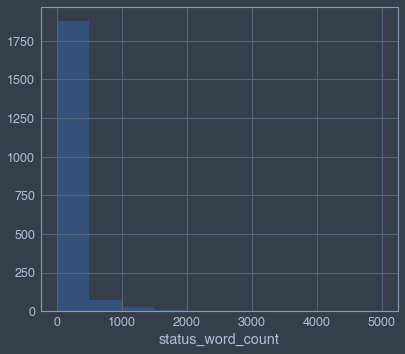

In [19]:
sns.distplot(dfc['status_word_count'],bins=10, kde=False)

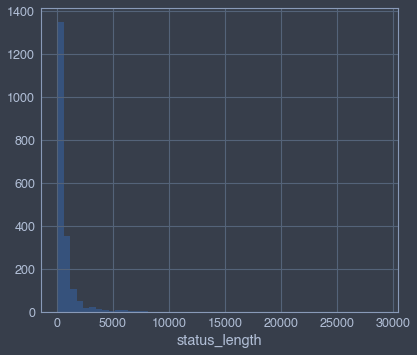

In [18]:
sns.distplot(dfc['status_length'], kde=False)

In [34]:
dfc['title']

0                                                        
1                                                        
2       i went on a long rant in reply to that post an...
3       2 intriguing ufo video footage segment recentl...
4                                                        
                              ...                        
1980    2 intriguing ufo video footage segment recentl...
1981                                                     
1982                                                     
1983                                                     
1984                                                     
Name: title, Length: 1985, dtype: object